# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [2]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology

from matplotlib import cm
from skimage.morphology import disk

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

(<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E8FD7A3C8>, <matplotlib.image.AxesImage object at 0x0000019E8FE1BB70>, Text(0.5,1,'Eroded Image (Disk Radius = 20)'))

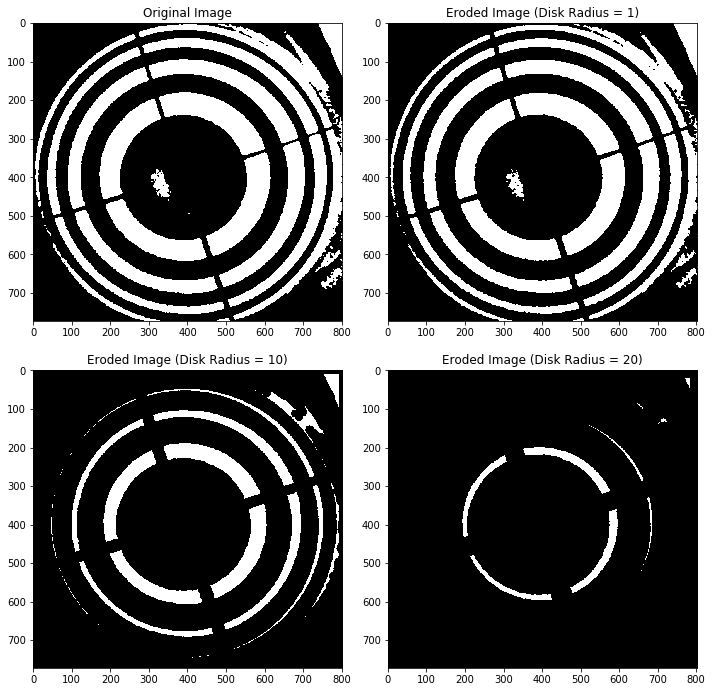

In [3]:
#Input
img = io.imread('./images/FindingContours.png')

#Erosion
erode_1 = morphology.binary_erosion(img, disk(1))
erode_10 = morphology.binary_erosion(img, disk(10))
erode_20 = morphology.binary_erosion(img, disk(20))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),io.imshow(img, cmap = cm.gray),plt.title('Original Image')
plt.subplot(222),io.imshow(erode_1 , cmap=cm.gray),plt.title('Eroded Image (Disk Radius = 1)')
plt.subplot(223),io.imshow(erode_10 , cmap=cm.gray),plt.title('Eroded Image (Disk Radius = 10)')
plt.subplot(224),io.imshow(erode_20 , cmap=cm.gray),plt.title('Eroded Image (Disk Radius = 20)')


** Q.1.2 Dilation **

(<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E8FBCE7F0>, <matplotlib.image.AxesImage object at 0x0000019E8FC1A860>, Text(0.5,1,'Dilated Image (Disk Radius = 20)'))

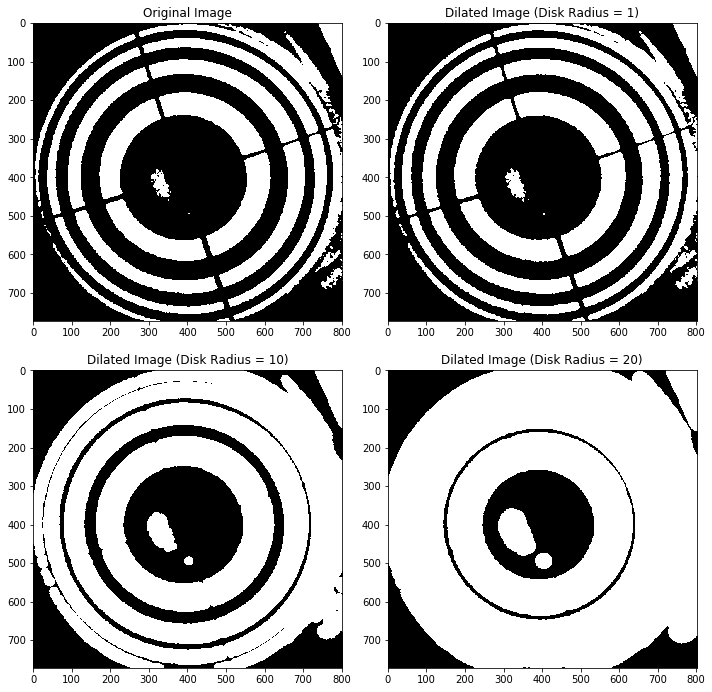

In [4]:
#Input
img = io.imread('./images/FindingContours.png')

#Dilation
dilate_1 = morphology.binary_dilation(img, disk(1))
dilate_10 = morphology.binary_dilation(img, disk(10))
dilate_20 = morphology.binary_dilation(img, disk(20))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),io.imshow(img, cmap = cm.gray),plt.title('Original Image')
plt.subplot(222),io.imshow(dilate_1 , cmap=cm.gray),plt.title('Dilated Image (Disk Radius = 1)')
plt.subplot(223),io.imshow(dilate_10 , cmap=cm.gray),plt.title('Dilated Image (Disk Radius = 10)')
plt.subplot(224),io.imshow(dilate_20 , cmap=cm.gray),plt.title('Dilated Image (Disk Radius = 20)')


** Q.1.3 Opening **

(<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E8FB64860>, <matplotlib.image.AxesImage object at 0x0000019E91530DD8>, Text(0.5,1,'Opening Image (Disk Radius = 20)'))

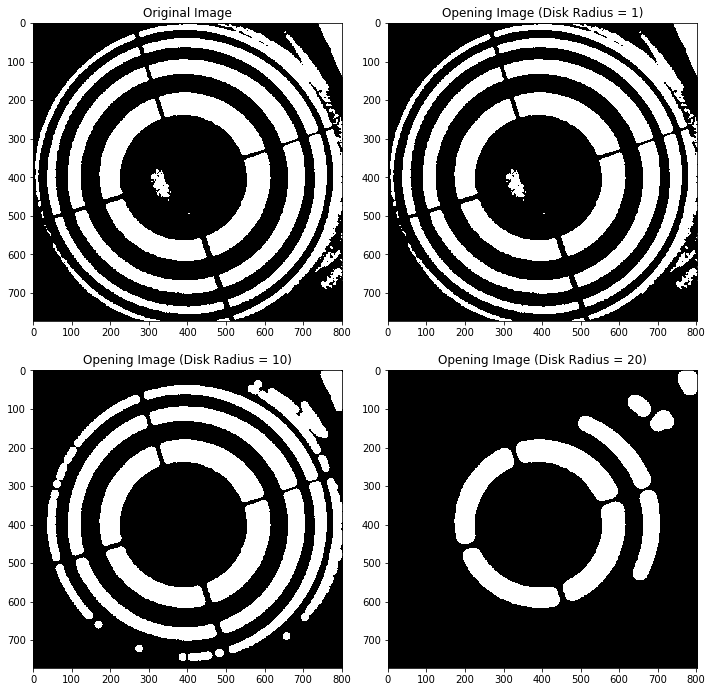

In [5]:
#Input
img = io.imread('./images/FindingContours.png')

#Opening
open_1 = morphology.binary_opening(img, disk(1))
open_10 = morphology.binary_opening(img, disk(10))
open_20 = morphology.binary_opening(img, disk(20))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),io.imshow(img, cmap = cm.gray),plt.title('Original Image')
plt.subplot(222),io.imshow(open_1 , cmap=cm.gray),plt.title('Opening Image (Disk Radius = 1)')
plt.subplot(223),io.imshow(open_10 , cmap=cm.gray),plt.title('Opening Image (Disk Radius = 10)')
plt.subplot(224),io.imshow(open_20 , cmap=cm.gray),plt.title('Opening Image (Disk Radius = 20)')


** Q.1.4 Closing**

(<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E8FC1AEF0>, <matplotlib.image.AxesImage object at 0x0000019E918C3390>, Text(0.5,1,'Closing Image (Disk Radius = 20)'))

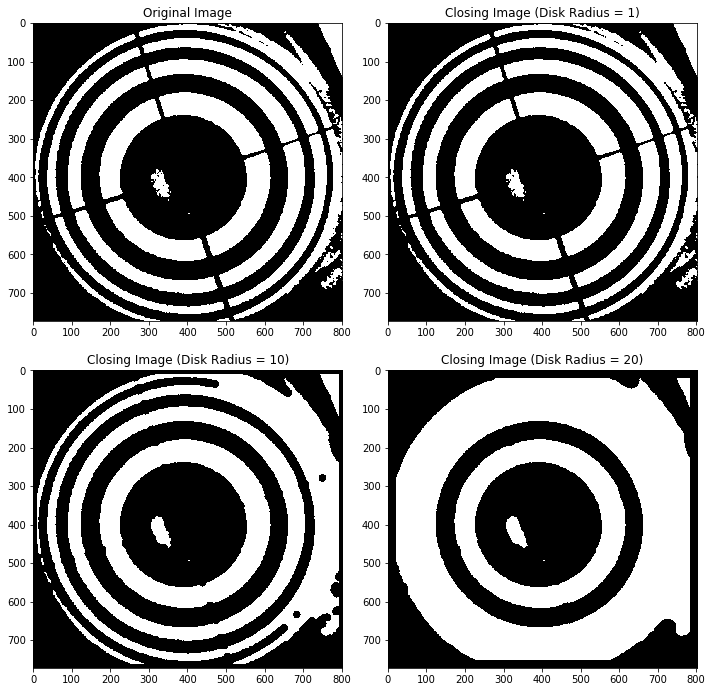

In [6]:
#Input
img = io.imread('./images/FindingContours.png')

#Closing
close_1 = morphology.binary_closing(img, disk(1))
close_10 = morphology.binary_closing(img, disk(10))
close_20 = morphology.binary_closing(img, disk(20))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),io.imshow(img, cmap = cm.gray),plt.title('Original Image')
plt.subplot(222),io.imshow(close_1 , cmap=cm.gray),plt.title('Closing Image (Disk Radius = 1)')
plt.subplot(223),io.imshow(close_10 , cmap=cm.gray),plt.title('Closing Image (Disk Radius = 10)')
plt.subplot(224),io.imshow(close_20 , cmap=cm.gray),plt.title('Closing Image (Disk Radius = 20)')


** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

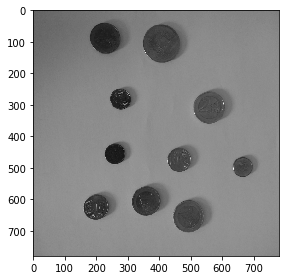

In [14]:
from scipy import misc
## Module util from skimage 

coins_img=io.imread('./images/coins.jpg','True')
coins_img = misc.imresize (coins_img , 25 , interp="bicubic" )

coins_img = img_as_ubyte(coins_img)
io.imshow(coins_img)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

(<matplotlib.image.AxesImage object at 0x0000019E96C1FDD8>, Text(0.5,1,'Global Otsu Thresholding'))

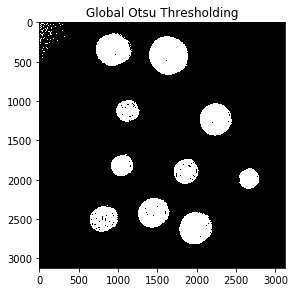

In [15]:
from skimage import filters

img_grey = rgb2gray(img)

threshold_global_otsu = filters.threshold_otsu(img_grey)
global_otsu = img_grey <= threshold_global_otsu
io.imshow(global_otsu),plt.title('Global Otsu Thresholding')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

(<matplotlib.image.AxesImage object at 0x0000019E96C84898>, Text(0.5,1,'Dilated Image'))

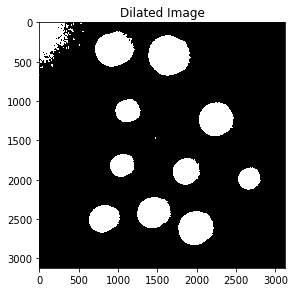

In [16]:
dilate_10 = morphology.binary_dilation(global_otsu, disk(10))

io.imshow(dilate_10),plt.title('Dilated Image')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\Users\DoN\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


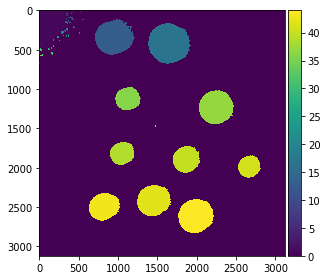

In [19]:
from skimage import measure

coin_labeled , lables= measure.label(dilate_10 , background= 0 ,return_num= True)
io.imshow(coin_labeled)


In [22]:
from skimage.draw import circle_perimeter

regions = measure.regionprops(coin_labeled)

print ('The number of regions is: {}'.format(len(regions)))

The number of regions is: 44


The radius of the region is: 10 pxs
The radius of the region is: 8 pxs
The radius of the region is: 13 pxs
The radius of the region is: 14 pxs
The radius of the region is: 20 pxs
The radius of the region is: 10 pxs
The radius of the region is: 14 pxs
The radius of the region is: 10 pxs
The radius of the region is: 10 pxs
The radius of the region is: 11 pxs
The radius of the region is: 10 pxs
The radius of the region is: 232 pxs
The radius of the region is: 11 pxs
The radius of the region is: 17 pxs
The radius of the region is: 11 pxs
The radius of the region is: 260 pxs
The radius of the region is: 11 pxs
The radius of the region is: 22 pxs
The radius of the region is: 19 pxs
The radius of the region is: 11 pxs
The radius of the region is: 15 pxs
The radius of the region is: 10 pxs
The radius of the region is: 11 pxs
The radius of the region is: 12 pxs
The radius of the region is: 10 pxs
The radius of the region is: 10 pxs
The radius of the region is: 11 pxs
The radius of the region is

C:\Users\DoN\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


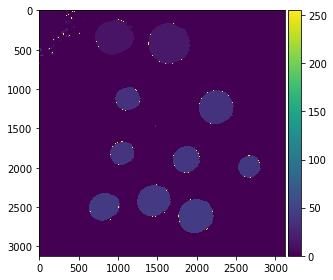

In [23]:
for i ,region in enumerate(regions):
    if i == 0:
        continue;
    radius = region.equivalent_diameter /2.
    print ('The radius of the region is: {:.0f} pxs'.format(radius))
    circle = circle_perimeter(int(region.centroid[0]) , int(region.centroid[1]), int(radius))
    coin_labeled[circle[0] , circle[1]] = 255

plt.figure()


io.imshow(coin_labeled)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

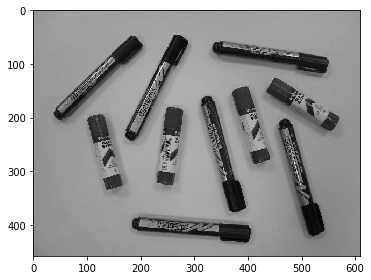

In [29]:
object_im=io.imread('./images/objets4.jpg','True')
#object_im = misc.imresize (object_im , 25 , interp="bicubic" )

io.imshow(object_im)

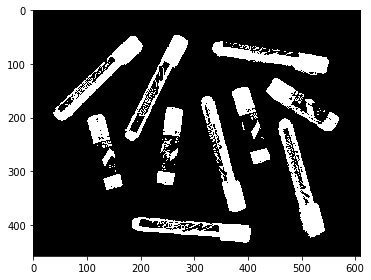

In [30]:
object_thresh = filters.threshold_otsu(object_im)
binary_object = object_im < object_thresh
io.imshow(binary_object)

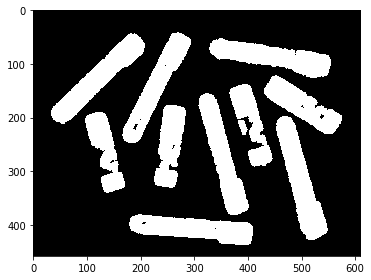

In [32]:
closed_object = morphology.dilation(binary_object, disk(5))
io.imshow(closed_object)

C:\Users\DoN\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


10


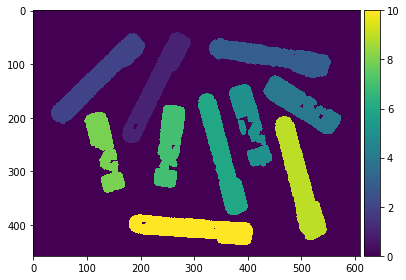

In [34]:
obj_labeled , obj_lables= measure.label(closed_object, background= 0 ,return_num= True)
io.imshow(obj_labeled)
print (obj_lables)

C:\Users\DoN\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


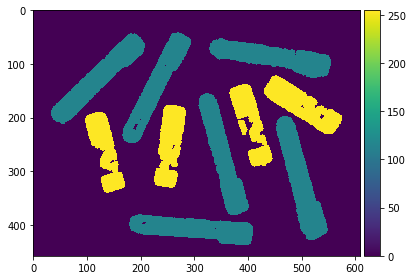

In [36]:
from skimage.draw import ellipse_perimeter


obj_regions =measure.regionprops(obj_labeled)
detected_obj = 0;

for i ,region in enumerate(obj_regions):

    long_axis = region.major_axis_length /2.
    short_axis = region.minor_axis_length /2.
    coords = region.coords
    
    if long_axis < 126:
        
        for x,y in coords:
            obj_labeled[x, y] = 255;
    else:
        for x,y in coords:
            obj_labeled[x, y] = 115;
   

plt.figure()

io.imshow(obj_labeled)